In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# load dataset
data = pd.read_csv('/content/Mall Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
print("Dimensions of dataset : ", data.shape)

Dimensions of dataset :  (200, 5)


# DATA PREPROCESSING

In [4]:
# check if any NAN values present
data.isnull().any()

CustomerID            False
Genre                 False
Age                   False
Annual_Income_(k$)    False
Spending_Score        False
dtype: bool

In [5]:
# customer id is unique for every individual thus not necessary
# so we can drop this feature 
data = data.drop('CustomerID', axis=1)

In [6]:
data['Gender'] = data['Genre']

In [7]:
data = data.drop('Genre', axis = 1)
data.head()

,Age,Annual_Income_(k$),Spending_Score,Gender
0,19,15,39,Male
1,21,15,81,Male
2,20,16,6,Female
3,23,16,77,Female
4,31,17,40,Female


# EXPLORATORY DATA ANALYSIS

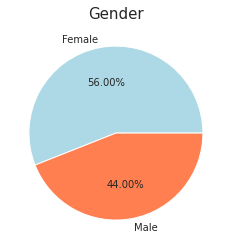

In [8]:
count = data['Gender'].value_counts()
label = ['Female','Male']
color = ['lightblue','coral']
plt.pie(count, labels=label, colors=color, autopct = '%.2f%%')
plt.title('Gender', fontsize = 15)
plt.show()

### Here we can conclude that women are more interested for shopping as compared to men.

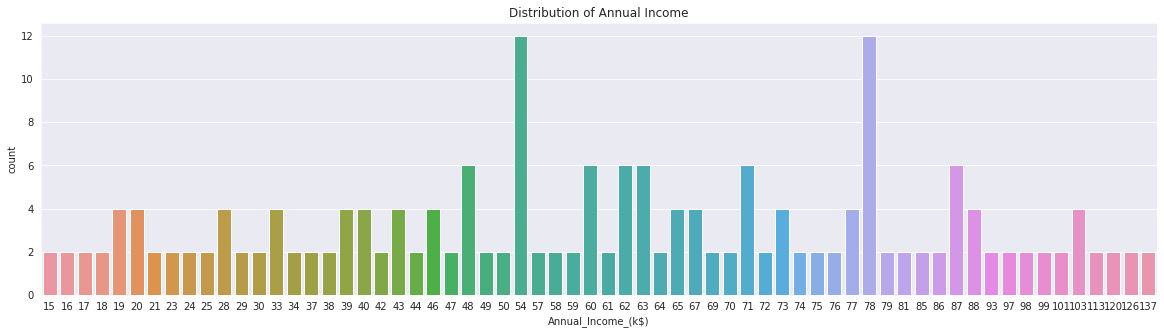

In [9]:
plt.figure(figsize=(20,5))
sns.countplot(data['Annual_Income_(k$)'])
plt.title('Distribution of Annual Income')
plt.show()

### Here we can see that people with income of 54k and 78k had highest head count. Also, mall has a huge variance in customers in terms of annual income which is ranging from (15k-137k)$

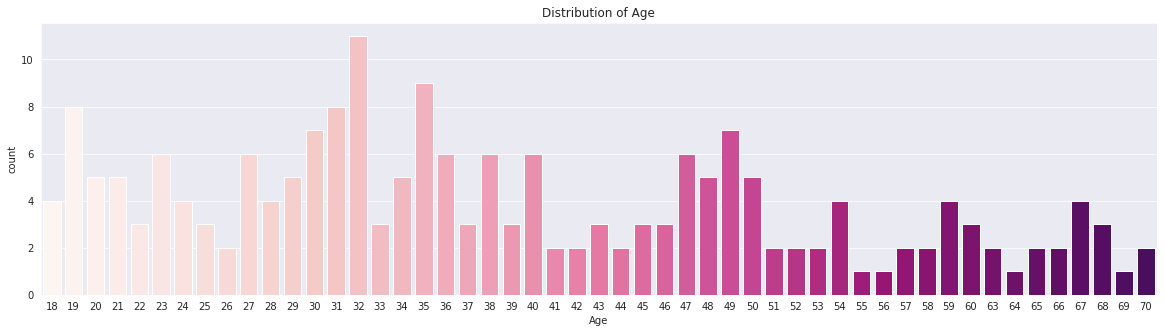

In [10]:
plt.figure(figsize=(20,5))
sns.countplot(data['Age'], palette='RdPu')
plt.title('Distribution of Age')
plt.show()

### This mall attracts customers of almost every age, thus must be satisfying needs of everyone. But people of age(18-24) and (27-40) but there is not clear pattern. Also low head count of older people.

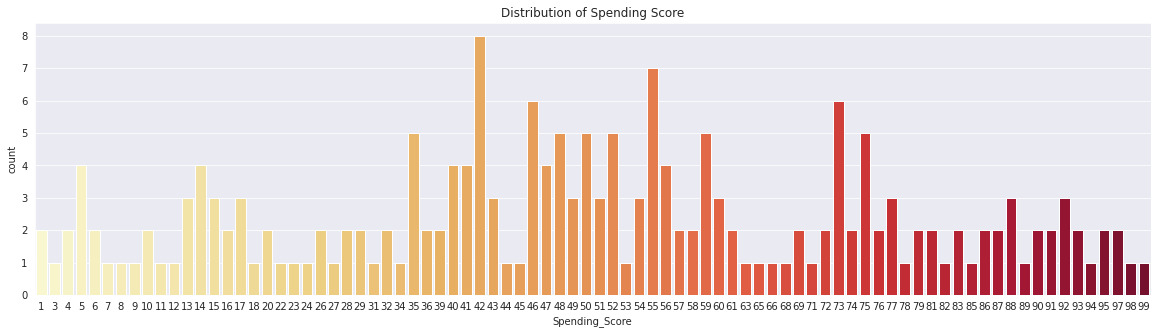

In [11]:
plt.figure(figsize=(20,5))
sns.countplot(data['Spending_Score'], palette='YlOrRd')
plt.title('Distribution of Spending Score')
plt.show()

### Here, we can conclude that most of the customers have an spending score ranging from 40-60. There is a spend score of 99, which clears variety of products at mall.

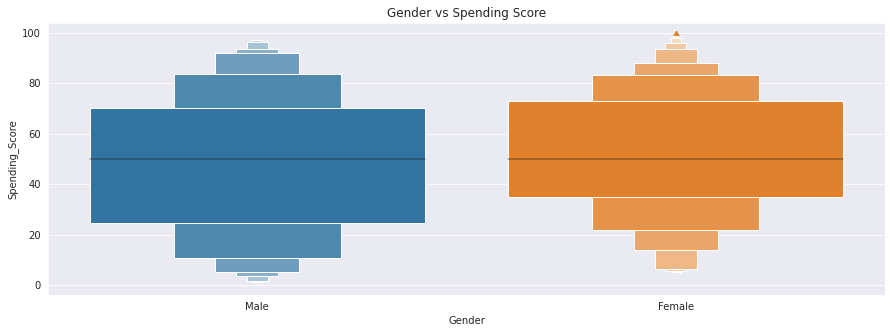

In [12]:
plt.figure(figsize=(15,5))
sns.boxenplot(data['Gender'],data['Spending_Score'])
plt.title('Gender vs Spending Score')
plt.show()

### Clearly Women have higher spending score (35-75) as compared to men (25-70). Which means women are more interested in shopping and spending as compared to men.

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


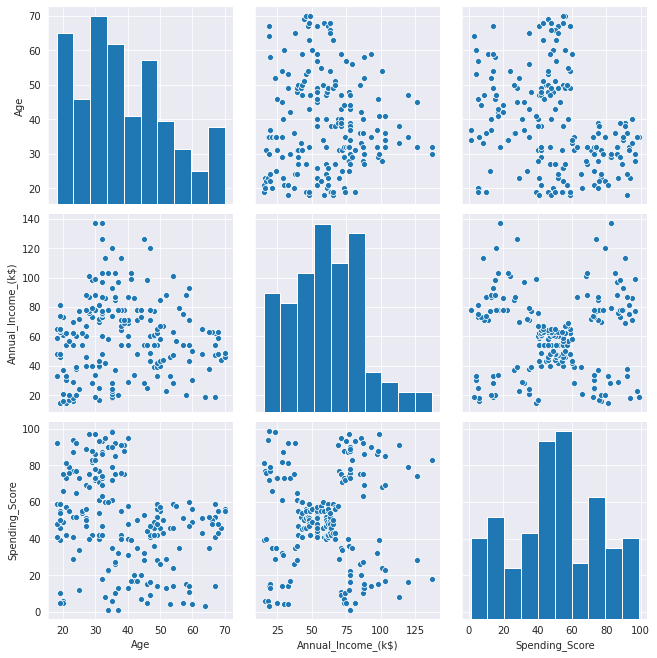

In [13]:
sns.pairplot(data,size=3)

# LABEL ENCODING

In [14]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Gender']=lb.fit_transform(data['Gender'])
data.head()

,Age,Annual_Income_(k$),Spending_Score,Gender
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


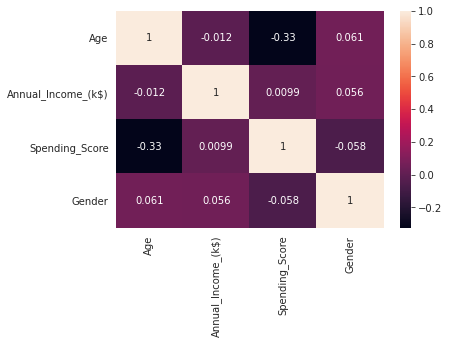

In [15]:
sns.heatmap(data.corr(), annot=True)

### Here, we can see that these variables are not much correlated to each other, so we cannot drop any of them.

# MODELING

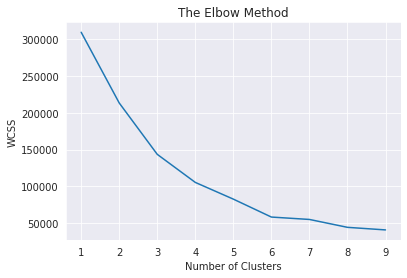

In [21]:
X = data
x = np.array(X)
from sklearn.cluster import KMeans
# elbow method for selecting number of clusters
wcss=[]
for i in range(1,10):
    kmeans=KMeans(n_clusters=i, init='k-means++',random_state=0, n_init = 1)
    kmeans.fit(x)
    # inertia is a criterion of minimizing intra cluster distance
    wcss.append(kmeans.inertia_)

plt.plot(range(1,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [22]:
# there is an abrupt fall for i=5
# so, number of clusters = 5
model=KMeans(n_clusters=5,init='k-means++',random_state=0, n_init = 1, max_iter=300)
y_means=model.fit_predict(x)

In [23]:
labels = model.labels_
print(labels)

[4 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 2 3 4 3 2 2 2 3 2 2 3 3 3 3 3 2 3 3 2 3 3 3 2 2 3 2 2 3 3 3 3
 3 2 2 2 2 3 3 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 2 2 3 2 3 3 3
 2 2 2 2 2 3 2 2 2 2 2 2 1 2 1 2 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1]


# VISUALISING CLUSTERS

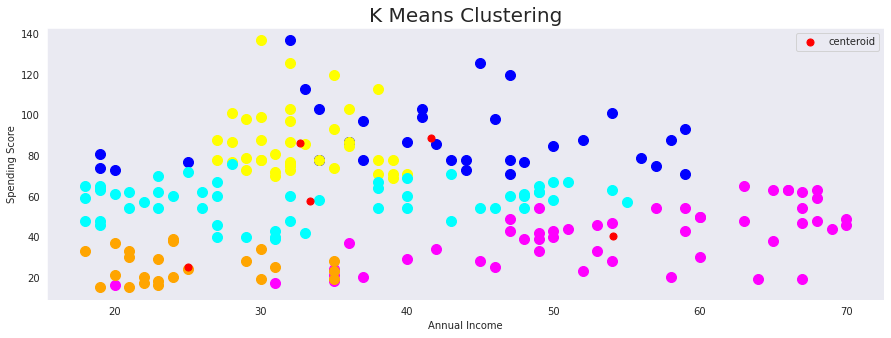

In [24]:
plt.figure(figsize=(15,5))
plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 100, c = 'blue')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 100, c = 'yellow')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s = 100, c = 'cyan')
plt.scatter(x[y_means == 3, 0], x[y_means == 3, 1], s = 100, c = 'magenta')
plt.scatter(x[y_means == 4, 0], x[y_means == 4, 1], s = 100, c = 'orange')
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:, 1], s = 50, c = 'red' , label = 'centeroid')

plt.title('K Means Clustering', fontsize = 20)
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.grid()
plt.show()


In [25]:
import plotly.graph_objs as go     # library for interactive visualisations
import plotly.offline as py        # for generating graphs as images
data['labels'] =  labels
# plots individual data into 3-dimensional space
trace1 = go.Scatter3d(
    x= data['Age'],
    y= data['Spending_Score'],
    z= data['Annual_Income_(k$)'],
    mode='markers',
     marker=dict(
        color = data['labels'], 
        size= 10,
        line=dict(
            color= data['labels'],
            width= 12
        ),
        opacity=0.8
     )
)
df = [trace1]

# layout of axes
layout = go.Layout(
    
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)

fig = go.Figure(data = df, layout = layout)
py.iplot(fig)

## CONCLUSION
1. People of young age (below 25),less income and high spend score
2. Genreal People - Medium income, middle age(25-30), medium spend score
3. Age(40-60), Medium income, low spend score
4. Age(50+), High income, low spend score
5. Age(30-40), High income, High spend score

So, here we can see people who are older and have medium or high income have low spend score, thus less interested. While, people of young age(<25), low income and age(30-40), high income have high spend score. 
